### Import
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
from scipy.stats import norm
sns.set()

C:\Users\Max\AppData\Local\Temp\ipykernel_21936\2844331127.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

### No Attributes (Baseline)
***

In [3]:
df_none = pd.read_csv('../assets/0_0_0_0_0_0_0_0.csv')
df_none.tail()

,winner,games,point_difference,playable_draws,total_draws,win_rate,points_difference_per_game,chance_of_playable_draw
995,Skill,27,47,2415,6543,0.513052,-3.658635,0.334994
996,Luck,25,-182,2192,6875,0.512538,-3.837513,0.334983
997,Luck,25,-156,2609,8415,0.512024,-3.989980,0.334962
998,Skill,29,80,3424,11182,0.512513,-3.905906,0.334931
999,Skill,20,424,4491,13747,0.513000,-3.478000,0.334919


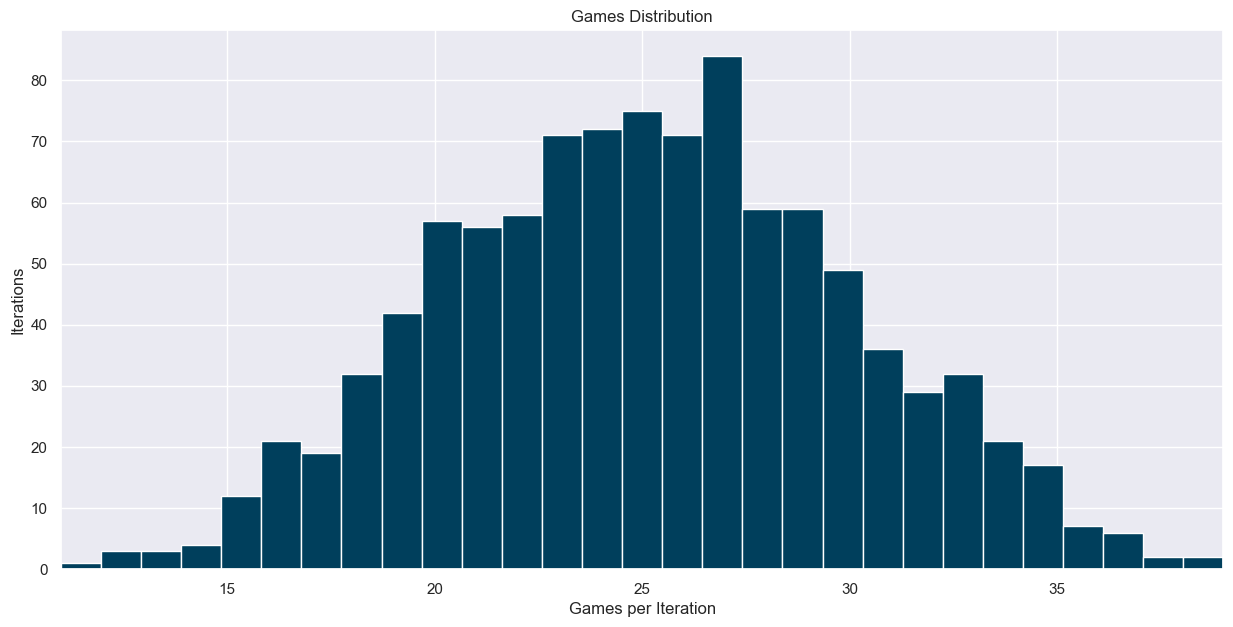

In [4]:
fig = plt.figure(1, figsize=(15,7))

plt.hist(df_none["games"], bins = len(df_none["games"].unique()), color = "#003f5c")
plt.title("Games Distribution")
plt.xlabel("Games per Iteration")
plt.ylabel("Iterations")
plt.margins(x=0)
plt.show()

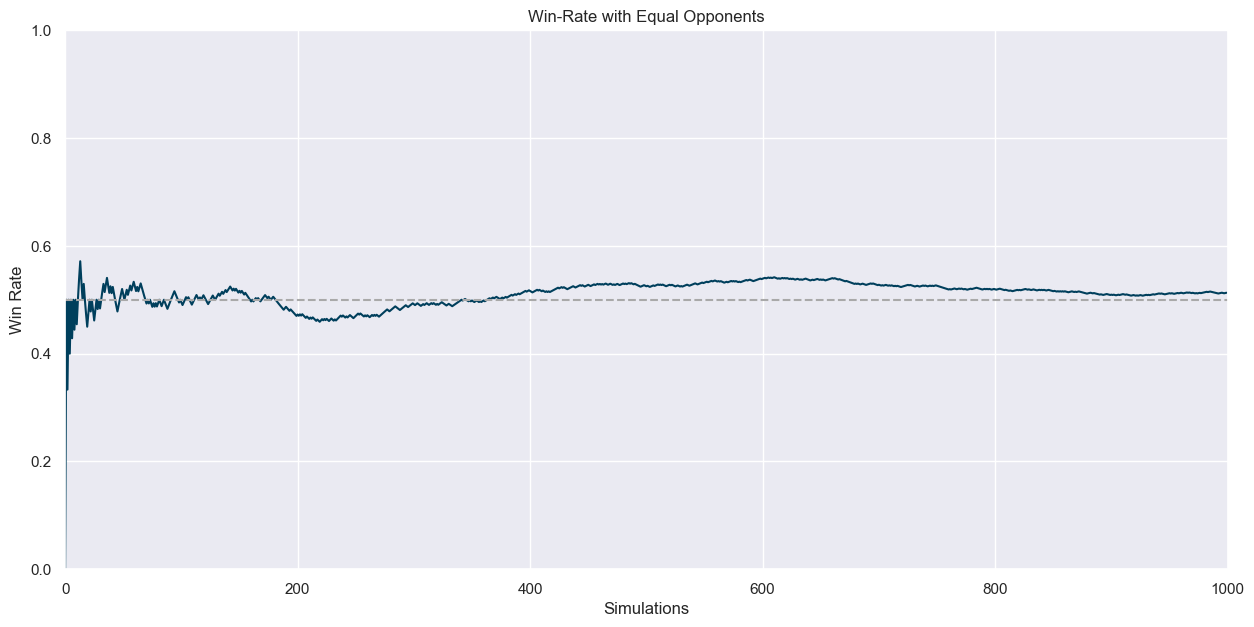

In [5]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_none.index, df_none["win_rate"], color = "#003f5c")
plt.hlines(0.5, 0, len(df_none), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Equal Opponents")
plt.ylim(0,1)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

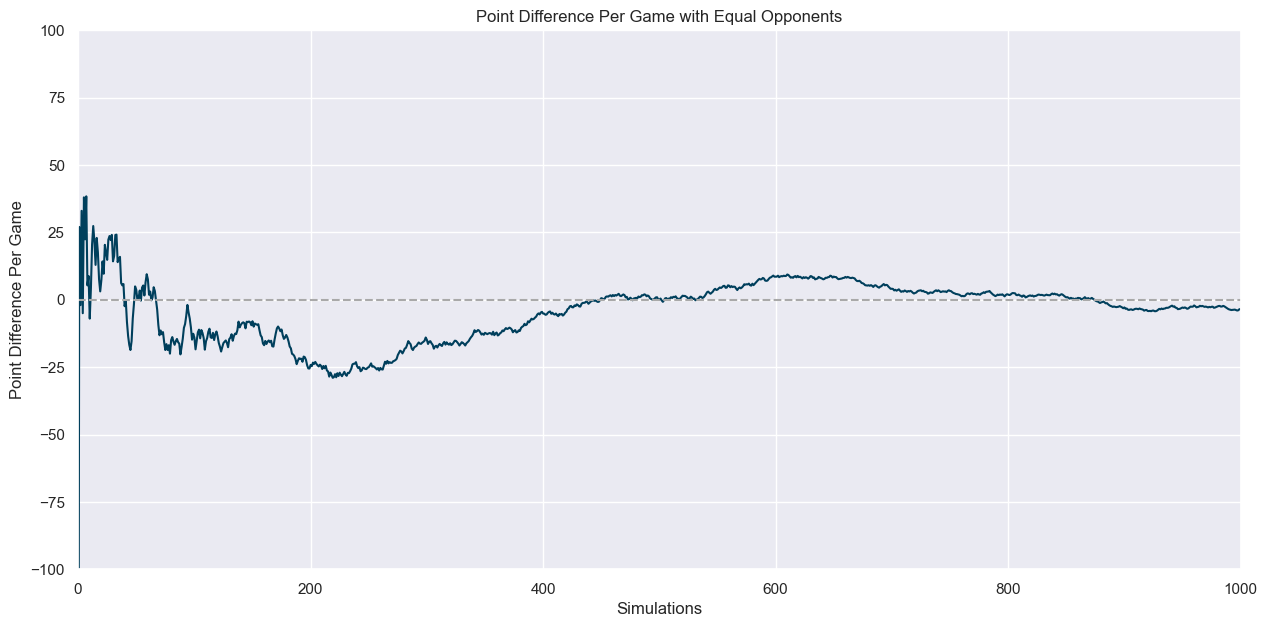

In [6]:
fig = plt.figure(1, figsize=(15,7))
plt.plot(df_none.index, df_none["points_difference_per_game"], color = "#003f5c")
plt.hlines(0, 0, len(df_none), colors="#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Equal Opponents")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.ylim(-100,100)
plt.show()

### Comparison of Skill Attributes
***

In [7]:
df_color = pd.read_csv('../assets/1_0_0_0_0_0_0_0.csv')
print(f"Wild_Color: \n {df_color.tail(1)}")

df_highest = pd.read_csv('../assets/0_1_0_0_0_0_0_0.csv')
print(f"Highest_Card: \n {df_highest.tail(1)}")

df_disfavor = pd.read_csv('../assets/0_0_1_0_0_0_0_0.csv')
print(f"Disfavor_Wild: \n {df_disfavor.tail(1)}")

df_skip = pd.read_csv('../assets/0_0_0_1_0_0_0_0.csv')
print(f"Skip_Chain: \n {df_skip.tail(1)}")

df_plus = pd.read_csv('../assets/0_0_0_0_1_0_0_0.csv')
print(f"Plus_Uno: \n {df_plus.tail(1)}")


Wild_Color: 
     winner  games  point_difference  playable_draws  total_draws  win_rate  \
999   Luck     34              -169            2790         7797     0.497   

     points_difference_per_game  chance_of_playable_draw  
999                       2.696                 0.335231  
Highest_Card: 
     winner  games  point_difference  playable_draws  total_draws  win_rate  \
999  Skill     23               131            3105         9071     0.524   

     points_difference_per_game  chance_of_playable_draw  
999                      10.072                 0.336404  
Disfavor_Wild: 
     winner  games  point_difference  playable_draws  total_draws  win_rate  \
999   Luck     25              -155            2095         6482     0.496   

     points_difference_per_game  chance_of_playable_draw  
999                       1.791                 0.336614  
Skip_Chain: 
     winner  games  point_difference  playable_draws  total_draws  win_rate  \
999   Luck     27              -340 

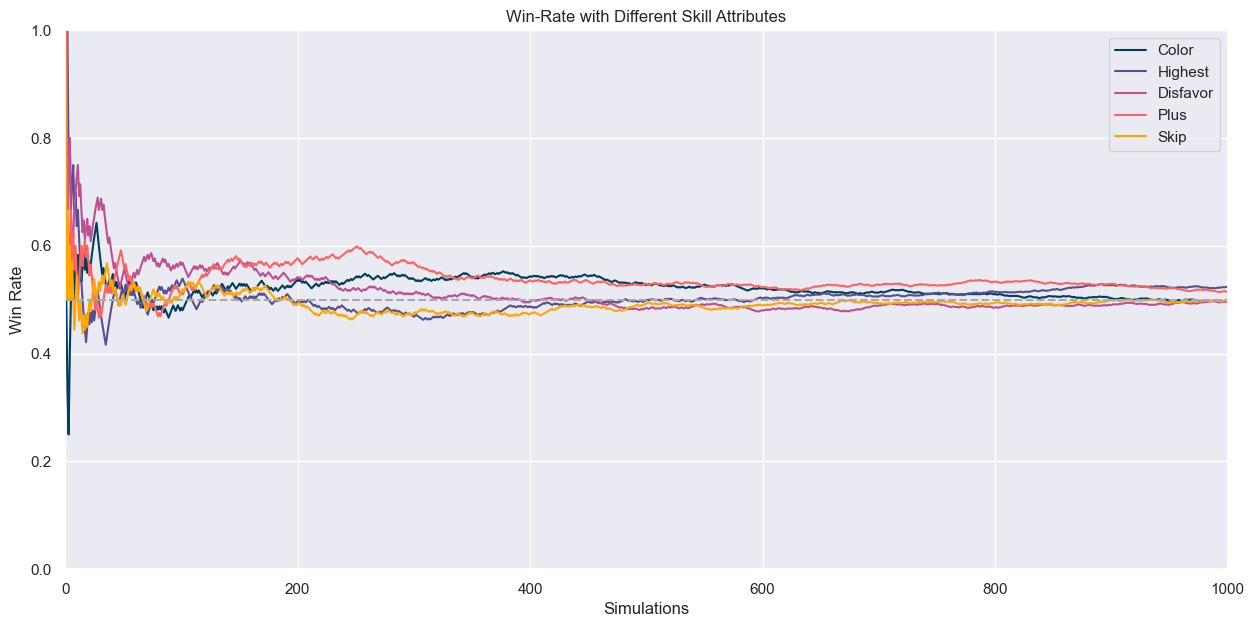

In [8]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_color.index, df_color["win_rate"], color = "#003f5c", label = "Color")
plt.plot(df_highest.index, df_highest["win_rate"], color = "#58508d", label = "Highest")
plt.plot(df_disfavor.index, df_disfavor["win_rate"], color = "#bc5090", label = "Disfavor")
plt.plot(df_plus.index, df_plus["win_rate"], color = "#ff6361", label = "Plus")
plt.plot(df_skip.index, df_skip["win_rate"], color = "#ffa600", label = "Skip")
plt.legend()

plt.hlines(0.5, 0, len(df_color), color = "#a9a9a9", linestyles="dashed")

plt.title("Win-Rate with Different Skill Attributes")
plt.ylim(0,1)
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.margins(x=0)
plt.show()

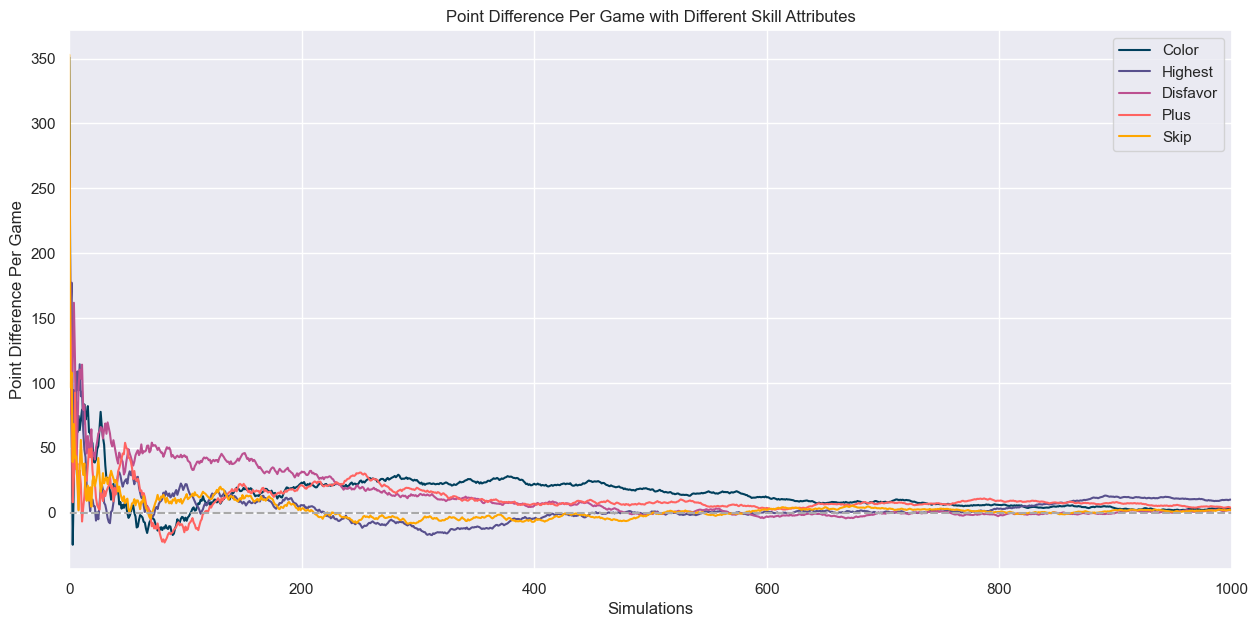

In [9]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(df_color.index, df_color["points_difference_per_game"], color = "#003f5c", label = "Color")
plt.plot(df_highest.index, df_highest["points_difference_per_game"], color = "#58508d", label = "Highest")
plt.plot(df_disfavor.index, df_disfavor["points_difference_per_game"], color = "#bc5090", label = "Disfavor")
plt.plot(df_plus.index, df_plus["points_difference_per_game"], color = "#ff6361", label = "Plus")
plt.plot(df_skip.index, df_skip["points_difference_per_game"], color = "#ffa600", label = "Skip")
plt.legend()

plt.hlines(0, 0, len(df_none), colors="#a9a9a9", linestyles="dashed")

plt.title("Point Difference Per Game with Different Skill Attributes")
plt.xlabel("Simulations")
plt.ylabel("Point Difference Per Game")
plt.margins(x=0)
plt.show()